In [22]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [3]:
df = pd.read_csv('data/train.csv')
df = df.dropna()
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,record_id;;
3,4200.0,36 months,13.33,142.19,C,C3,Receptionist,< 1 year,MORTGAGE,21600.0,...,19.0,w,0.0,1.0,INDIVIDUAL,0.0,165.0,28187.0,14500.0,453447199;;
7,14000.0,36 months,15.31,487.45,C,C2,Department of the Army,10+ years,MORTGAGE,96000.0,...,29.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,276267.0,39700.0,453322484;;
16,8650.0,36 months,12.12,287.80,B,B3,Haven Hospice,8 years,RENT,76000.0,...,20.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,614403.0,10000.0,453286318;;
17,25000.0,60 months,17.27,624.95,C,C5,Cheney Public Schools,6 years,MORTGAGE,108000.0,...,40.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,337866.0,23800.0,453277374;;
19,9250.0,36 months,16.49,327.45,D,D3,teaching,10+ years,OWN,18500.0,...,27.0,w,0.0,1.0,INDIVIDUAL,0.0,406.0,154326.0,3900.0,453356047;;


In [5]:
df.replace('n/a', np.nan,inplace=True)
df.emp_length.fillna(value=0,inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)

data = df.drop(['emp_title', 'home_ownership', 'pymnt_plan','record_id;;', 'earliest_cr_line', 'grade', 'sub_grade', 'application_type', 'issue_d', 'zip_code', 'policy_code', 'verification_status', 'purpose', 'initial_list_status', 'addr_state'], axis=1)
data['term'] = pd.factorize(data['term'])[0]
data['loan_amnt'] = data['loan_amnt'].astype(float)

In [6]:
data.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,67394.000000,67394.000000,67394.000000,67394.00000,67394.000000,6.739400e+04,67394.000000,67394.000000,67394.000000,67394.000000,...,67394.000000,67394.000000,67394.000000,67394.000000,67394.000000,67394.000000,67394.000000,67394.000000,6.739400e+04,6.739400e+04
mean,14268.451197,0.250957,14.785815,442.98176,6.308203,7.771454e+04,0.758050,17.219408,0.606612,0.894234,...,11.734769,0.184334,14054.845402,54.791627,28.302564,0.015001,0.009259,260.686604,1.476280e+05,2.645796e+04
std,8175.458791,0.433567,4.310464,247.70231,3.494571,5.892471e+04,0.428268,7.853319,1.082507,1.090575,...,4.975294,0.517941,17272.584119,23.355879,11.517200,0.133874,0.104944,2338.285618,1.565746e+05,2.587836e+04
min,1000.000000,0.000000,5.320000,30.42000,1.000000,8.000000e+03,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+02
25%,8000.000000,0.000000,11.990000,266.73000,3.000000,5.000000e+04,1.000000,11.350000,0.000000,0.000000,...,8.000000,0.000000,5668.000000,37.800000,20.000000,0.000000,0.000000,0.000000,3.198450e+04,1.210000e+04
50%,12000.000000,0.000000,14.330000,387.64000,7.000000,6.750000e+04,1.000000,16.710000,0.000000,1.000000,...,11.000000,0.000000,10155.000000,55.500000,27.000000,0.000000,0.000000,0.000000,9.523500e+04,2.000000e+04
75%,19950.000000,1.000000,17.570000,574.83750,10.000000,9.200000e+04,1.000000,22.700000,1.000000,1.000000,...,14.000000,0.000000,17445.000000,72.600000,35.000000,0.000000,0.000000,0.000000,2.213510e+05,3.290000e+04
max,35000.000000,1.000000,28.990000,1424.57000,10.000000,7.141778e+06,1.000000,39.990000,22.000000,6.000000,...,55.000000,12.000000,975800.000000,892.300000,111.000000,5.000000,5.000000,296368.000000,8.000078e+06,1.013700e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67394 entries, 3 to 200188
Data columns (total 21 columns):
loan_amnt                     67394 non-null float64
term                          67394 non-null int64
int_rate                      67394 non-null float64
installment                   67394 non-null float64
emp_length                    67394 non-null int32
annual_inc                    67394 non-null float64
loan_status                   67394 non-null float64
dti                           67394 non-null float64
delinq_2yrs                   67394 non-null float64
inq_last_6mths                67394 non-null float64
mths_since_last_delinq        67394 non-null float64
open_acc                      67394 non-null float64
pub_rec                       67394 non-null float64
revol_bal                     67394 non-null float64
revol_util                    67394 non-null float64
total_acc                     67394 non-null float64
collections_12_mths_ex_med    67394 non-null f

In [8]:
array = data.values
Y = data['loan_status'].values

X = data.drop(['loan_status'], axis=1)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
print(x_test)

[[ 2.54298623 -0.583547    0.3787723  ... -0.08759098 -0.57230279
  -0.3177038 ]
 [ 2.35875838  1.71365803  2.13852273 ... -0.08759098 -0.87120882
  -0.57630285]
 [ 1.68325627 -0.583547   -0.34924039 ... -0.08759098  0.95268149
   3.84375166]
 ...
 [-1.51002642 -0.583547    0.10518792 ... -0.08759098  1.94435935
  -0.53253994]
 [ 0.45507062 -0.583547   -0.27504801 ... -0.08759098 -0.8471831
  -0.02727718]
 [-1.14157073 -0.583547   -0.08493005 ...  0.12507251  0.5532682
  -0.29383312]]


In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(x_train,y_train)

C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
classifier.fit(x_test,y_test)

C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
y_pred = classifier.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [54]:
cm

array([[ 385, 2947],
       [ 286, 9861]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

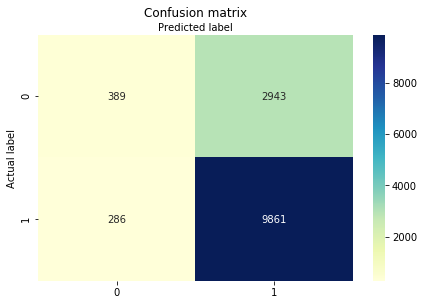

In [20]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7604421693003932
Precision: 0.7701499531396439
Recall: 0.971814329358431


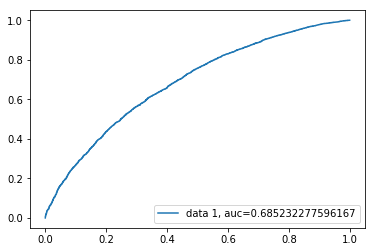

In [26]:
y_pred_proba = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.58      0.12      0.19      3332
         1.0       0.77      0.97      0.86     10147

   micro avg       0.76      0.76      0.76     13479
   macro avg       0.67      0.54      0.53     13479
weighted avg       0.72      0.76      0.69     13479



In [42]:
from sklearn import metrics
print (metrics.accuracy_score(y_test,classifier.predict(x_test)))

0.7638023474858716


In [29]:
data.corr()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,1.000000,0.419959,0.208352,0.956052,0.071683,0.331409,-0.089541,0.014169,0.014935,-0.001927,...,0.164494,-0.084383,0.321277,0.114088,0.179453,-0.004690,0.013152,-0.014868,0.287081,0.328163
term,0.419959,1.000000,0.476416,0.180272,0.048295,0.064601,-0.162773,0.065575,0.002857,0.020894,...,0.061131,-0.018544,0.086792,0.049467,0.081164,0.009275,0.014480,-0.003611,0.103366,0.081567
int_rate,0.208352,0.476416,1.000000,0.187112,0.005571,-0.042846,-0.227400,0.138592,0.047113,0.243961,...,-0.009691,0.049780,-0.005492,0.213175,-0.036013,0.024151,0.034099,-0.000813,-0.075765,-0.133983
installment,0.956052,0.180272,0.187112,1.000000,0.062778,0.326182,-0.071719,0.012004,0.021185,0.022964,...,0.156774,-0.077059,0.312678,0.132756,0.162644,-0.004393,0.014937,-0.015103,0.259932,0.304674
emp_length,0.071683,0.048295,0.005571,0.062778,1.000000,0.042791,0.035500,0.013064,0.003425,-0.005459,...,-0.003986,0.011143,0.057776,0.041843,0.067811,-0.005284,0.008484,0.005906,0.078953,0.051782
annual_inc,0.331409,0.064601,-0.042846,0.326182,0.042791,1.000000,0.050158,-0.217314,0.047168,0.058778,...,0.103196,-0.017444,0.335633,0.044050,0.159687,0.001301,0.015735,0.008557,0.457717,0.309977
loan_status,-0.089541,-0.162773,-0.227400,-0.071719,0.035500,0.050158,1.000000,-0.137047,-0.040475,-0.041448,...,-0.026789,-0.005101,0.004155,-0.067799,0.024526,-0.015370,-0.017175,0.004510,0.058357,0.036723
dti,0.014169,0.065575,0.138592,0.012004,0.013064,-0.217314,-0.137047,1.000000,0.000412,-0.006522,...,0.268704,-0.055382,0.109052,0.155656,0.195262,-0.005199,0.010311,-0.025274,-0.045209,0.056544
delinq_2yrs,0.014935,0.002857,0.047113,0.021185,0.003425,0.047168,-0.040475,0.000412,1.000000,0.009338,...,0.052653,-0.046127,-0.008785,-0.020086,0.089934,0.041644,0.105077,-0.022012,0.063417,-0.005267
inq_last_6mths,-0.001927,0.020894,0.243961,0.022964,-0.005459,0.058778,-0.041448,-0.006522,0.009338,1.000000,...,0.115781,0.054665,-0.015990,-0.092051,0.140858,0.001517,-0.006742,0.011061,0.042169,0.015634


In [31]:
from sklearn.linear_model import Lasso, Ridge

In [33]:
lassoregressor = Lasso().fit(X, Y)
['{1} : {0}'.format(a, b) for a, b in zip(lassoregressor.coef_, data.columns)]

['loan_amnt : -1.0807764761404459e-05',
 'term : -0.0',
 'int_rate : -0.0',
 'installment : 0.00012680937692760168',
 'emp_length : 0.0',
 'annual_inc : 4.312552089081465e-07',
 'loan_status : -0.0',
 'dti : -0.0',
 'delinq_2yrs : -0.0',
 'inq_last_6mths : 0.0',
 'mths_since_last_delinq : -0.0',
 'open_acc : -0.0',
 'pub_rec : -2.5319699269582124e-06',
 'revol_bal : -0.0',
 'revol_util : 0.0',
 'total_acc : -0.0',
 'collections_12_mths_ex_med : -0.0',
 'acc_now_delinq : 1.6082200202672528e-07',
 'tot_coll_amt : 1.8667365582840575e-07',
 'tot_cur_bal : 2.0427755623570475e-06']

In [34]:
ridgeregressor = Ridge().fit(X, Y)
['{1} : {0}'.format(a, b) for a, b in zip(ridgeregressor.coef_, data.columns)]

['loan_amnt : 1.9215717164408585e-06',
 'term : -0.09923149877700735',
 'int_rate : -0.013622827016765789',
 'installment : -0.00015054438457878604',
 'emp_length : 0.004437807844104543',
 'annual_inc : 9.105815603851118e-08',
 'loan_status : -0.005795083306652011',
 'dti : -0.012379750214268292',
 'delinq_2yrs : -0.0049563981279523795',
 'inq_last_6mths : 0.0002708732781367006',
 'mths_since_last_delinq : -0.004078742455801941',
 'open_acc : -0.007902730826385573',
 'pub_rec : -2.1319006399934197e-07',
 'revol_bal : -0.00027688699279425106',
 'revol_util : 0.0025606487676698387',
 'total_acc : -0.030322555312314987',
 'collections_12_mths_ex_med : -0.030975937409852335',
 'acc_now_delinq : -3.398986787080494e-07',
 'tot_coll_amt : 1.2973639377280246e-07',
 'tot_cur_bal : 4.592954597777963e-07']

In [37]:
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
for i, a in enumerate(alphas):
    lasso_reg = Lasso(alpha=a).fit(X, Y)
    ridge_reg = Ridge(alpha=a).fit(X, Y)
    coefs_lasso[i,:] = lasso_reg.coef_
    coefs_ridge[i,:] = ridge_reg.coef_

Text(0.5, 1.0, 'Ridge')

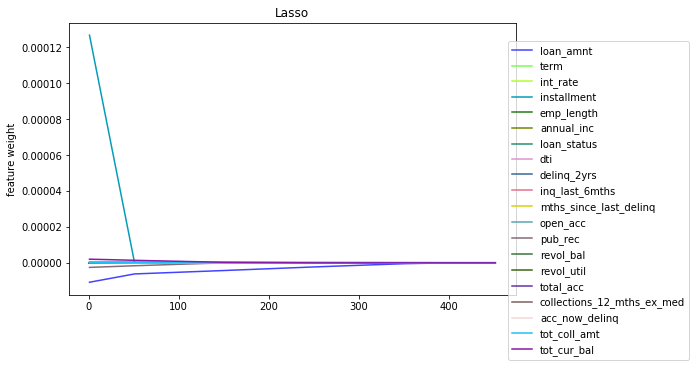

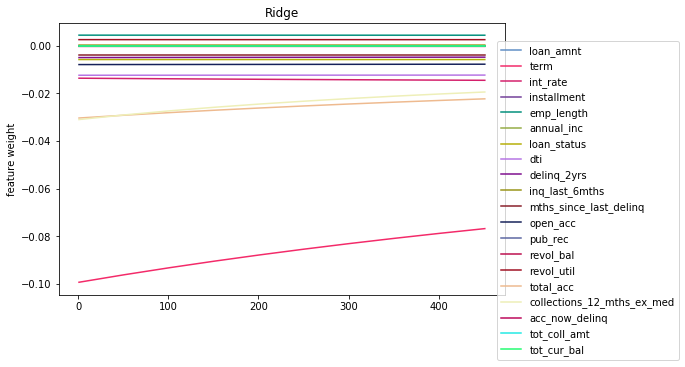

In [38]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
#plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
#plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")